<a href="https://colab.research.google.com/github/aaryanpawar16/VisionSpeak/blob/main/VisionSpeak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Uninstall conflicting libraries first
!pip uninstall -y langchain langchain-community langchain-core

# 2. Install the specific compatible version and other tools
!pip install paddlepaddle paddleocr transformers google-cloud-vision torch torchaudio librosa numpy opencv-python matplotlib gtts
!pip install langchain==0.0.350

# 3. Install system libraries
!apt-get install -y libgl1-mesa-glx

  Using cached langchain-0.0.350-py3-none-any.whl.metadata (13 kB)
  Using cached langchain_community-0.0.38-py3-none-any.whl.metadata (8.7 kB)
  Using cached langchain_core-0.1.53-py3-none-any.whl.metadata (5.9 kB)
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
INFO: pip is looking at multiple versions of langchain-community to determine which version is compatible with other requirements. This could take a while.
  Using cached langchain_community-0.0.37-py3-none-any.whl.metadata (8.7 kB)
  Using cached langchain_community-0.0.36-py3-none-any.whl.metadata (8.7 kB)
  Using cached langchain_community-0.0.35-py3-none-any.whl.metadata (8.7 kB)
  Using cached langchain_community-0.0.34-py3-none-any.whl.metadata (8.5 kB)
  Using cached langchain_community-0.0.33-py3-none-any.whl.metadata (8.5 kB)
  Using cached langchain_community-0.0.32-py3-none-any.whl.metadata (8.5 kB)
  Using cached langchain_community-0.0.31-py3-none-any.whl.met

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgl1-mesa-glx is already the newest version (23.0.4-0ubuntu1~22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.


In [1]:
import cv2
import numpy as np
import torch
import librosa
import torchaudio
from paddleocr import PaddleOCR
from transformers import TrOCRProcessor, VisionEncoderDecoderModel, BlipProcessor, BlipForConditionalGeneration
from gtts import gTTS
from IPython.display import Audio, display, HTML, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import matplotlib.pyplot as plt
from google.colab import files
import io

print("⏳ Loading AI Models... this may take a moment.")

# Initialize PaddleOCR (English)
paddle_ocr = PaddleOCR(use_angle_cls=True, lang='en')

# Initialize TrOCR
trocr_processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
trocr_model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Initialize BLIP
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

print("✅ All Models Loaded Successfully!")

Checking connectivity to the model hosters, this may take a while. To bypass this check, set `DISABLE_MODEL_SOURCE_CHECK` to `True`.


⏳ Loading AI Models... this may take a moment.


/tmp/ipython-input-1426365447.py:19: DeprecationWarning: The parameter `use_angle_cls` has been deprecated and will be removed in the future. Please use `use_textline_orientation` instead.
  paddle_ocr = PaddleOCR(use_angle_cls=True, lang='en')
/usr/local/lib/python3.12/dist-packages/paddle/utils/cpp_extension/extension_utils.py:712: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Using official model (PP-LCNet_x1_0_doc_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_doc_ori`.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your setti

Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/766 [00:00<?, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.75M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

Creating model: ('UVDoc', None)
Using official model (UVDoc), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/UVDoc`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/330 [00:00<?, ?B/s]

inference.pdiparams:   0%|          | 0.00/32.1M [00:00<?, ?B/s]

Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Using official model (PP-LCNet_x1_0_textline_ori), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-LCNet_x1_0_textline_ori`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/735 [00:00<?, ?B/s]

inference.pdiparams:   0%|          | 0.00/6.74M [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/PP-OCRv5_server_det`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/87.9M [00:00<?, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.json: 0.00B [00:00, ?B/s]

inference.yml:   0%|          | 0.00/903 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

Creating model: ('en_PP-OCRv5_mobile_rec', None)
Using official model (en_PP-OCRv5_mobile_rec), the model files will be automatically downloaded and saved in `/root/.paddlex/official_models/en_PP-OCRv5_mobile_rec`.


Fetching 6 files:   0%|          | 0/6 [00:00<?, ?it/s]

inference.json: 0.00B [00:00, ?B/s]

README.md: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

.gitattributes: 0.00B [00:00, ?B/s]

inference.pdiparams:   0%|          | 0.00/7.77M [00:00<?, ?B/s]

inference.yml: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

✅ All Models Loaded Successfully!


In [2]:
def take_photo(filename='captured_image.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

def upload_image_manually():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename
    return None

def choose_input_method():
    print("\n📸 Choose an option:")
    print("1️⃣ Use Camera")
    print("2️⃣ Upload Image Manually")
    choice = input("Enter your choice (1 or 2): ")
    return choice

In [6]:
# Extract text using PaddleOCR
def extract_text(image_path):
    try:
        # call ocr without cls=True to avoid the TypeError in newer versions
        result = paddle_ocr.ocr(image_path)

        extracted_text = ""
        if result and isinstance(result, list):
            for line in result:
                 # PaddleOCR v3 sometimes returns a list of lists, sometimes just a list
                 if line:
                    # Handle nested lists if necessary
                    if isinstance(line, list):
                        for word_info in line:
                            if word_info and len(word_info) > 1:
                                extracted_text += word_info[1][0] + " "
                    # Handle flat structure
                    elif isinstance(line, tuple) or len(line) > 1:
                         extracted_text += line[1][0] + " "

        return extracted_text.strip()
    except Exception as e:
        print(f"⚠️ OCR Warning: {e}")
        return ""

# Generate AI-based image description using BLIP
def generate_description(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    inputs = blip_processor(image, return_tensors="pt")
    out = blip_model.generate(**inputs)
    description = blip_processor.decode(out[0], skip_special_tokens=True)
    return description

# Convert text to speech
def text_to_speech(text, output_path="output.mp3"):
    tts = gTTS(text=text, lang="en")
    tts.save(output_path)
    return output_path

# Main Processing Pipeline
def process_image(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Error: Could not read image file.")
        return None

    # Show the image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    print("🔍 Scanning for text...")
    extracted_text = extract_text(image_path)

    if extracted_text:
        print(f"✅ Text detected: {extracted_text}")
        final_text = extracted_text
    else:
        print("⚠️ No text detected! Switching to AI image description...")
        description = generate_description(image_path)
        print(f"🖼️ Image Description: {description}")
        final_text = description

    audio_file = text_to_speech(final_text)
    return audio_file


📸 Choose an option:
1️⃣ Use Camera
2️⃣ Upload Image Manually
Enter your choice (1 or 2): 2


Saving beautiful-sunset-pictures-ir85pxnajbekgbhh.jpg to beautiful-sunset-pictures-ir85pxnajbekgbhh (1).jpg

🔄 Processing your image...


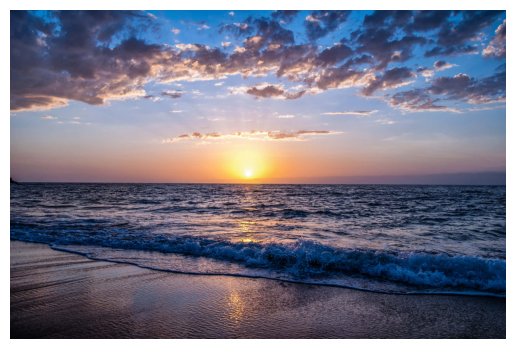

🔍 Scanning for text...


/tmp/ipython-input-1735434418.py:5: DeprecationWarning: Please use `predict` instead.
  result = paddle_ocr.ocr(image_path)


⚠️ OCR Warning: (Unimplemented) ConvertPirAttribute2RuntimeAttribute not support [pir::ArrayAttribute<pir::DoubleAttribute>]  (at /paddle/paddle/fluid/framework/new_executor/instruction/onednn/onednn_instruction.cc:116)

⚠️ No text detected! Switching to AI image description...
🖼️ Image Description: a beach with waves
🔊 Playing Audio...



📸 Do you want to process another image? (yes/no): n
👋 Exiting. Have a great day!


In [7]:
while True:
    img_path = None
    choice = choose_input_method()

    if choice == '1':
        try:
            img_path = take_photo()
        except Exception as e:
            print(f"Error capturing image: {e}")
    elif choice == '2':
        img_path = upload_image_manually()
    else:
        print("❌ Invalid choice. Please enter 1 or 2.")
        continue

    if img_path:
        print("\n🔄 Processing your image...")
        audio_file = process_image(img_path)

        if audio_file:
            print(f"🔊 Playing Audio...")
            display(Audio(audio_file, autoplay=True))
    else:
        print("❌ No image selected.")

    another = input("\n📸 Do you want to process another image? (yes/no): ").strip().lower()
    if another not in ["yes", "y"]:
        print("👋 Exiting. Have a great day!")
        break